In [57]:
## Topic: Artificial Neural Network for Regression
## Code adopted from Udemy Course: A deep understanding of deep learning Mike X Cohen
## contains additional code and modifications

# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

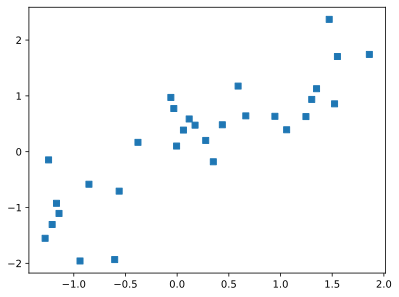

In [58]:
## Topic: Artificial Neural Network for Regression
# create the data
N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

# plot the random data
plt.plot(x,y,'s')
plt.show()

In [59]:
# build the model
ANNreg = nn.Sequential(
    nn.Linear(1,1), # input layer
    nn.ReLU(), # activation function
    nn.Linear(1,1) # output layer
)
ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [60]:
# learning rate
learningRate = 0.05

# loss function
loss_Function = nn.MSELoss()

# optimizer 
# decide the type of gradient descent to implement)
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

In [61]:
# set the number of epochs
num_epochs = 500
losses = torch.zeros(num_epochs)

## Train the model
for epochi in range(num_epochs):
    
    # forward pass
    yHAT = ANNreg(x)
    
    # compute loss
    loss = loss_Function(yHAT,y)
    losses[epochi] = loss
    
    # backpropagation 
    optimizer.zero_grad()
    optimizer.step()

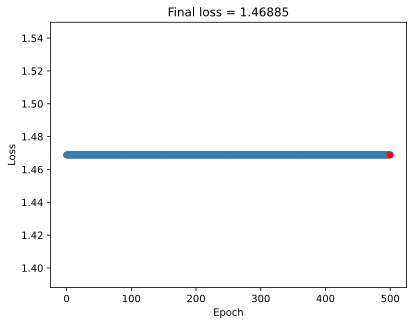

In [62]:
# show the losses

# manually compute the losses
# final forward pass
predictions = ANNreg(x)

# final loss (MSE)
test_loss = (predictions-y).pow(2).mean()

# plot the losses
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(num_epochs,test_loss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %test_loss.item())
plt.show()

In [63]:
test_loss.item()

1.4688478708267212

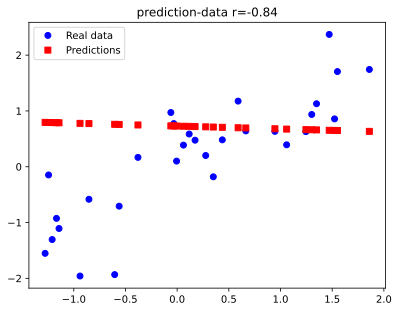

In [64]:
# plot the data
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()

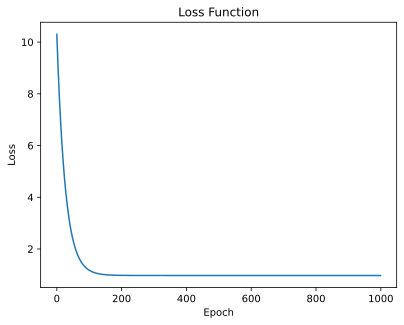

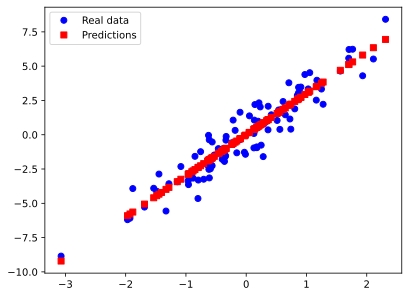

In [68]:
## Topic: Artificial Neural Network for Regression
# This is an improved version of the code without for loops

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate some random data
x = torch.randn(100, 1)
y = 3 * x + torch.randn(100, 1)

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        return self.linear(x)

model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 1000
loss_values = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    loss_values.append(loss.item())

# Plotting the loss function
plt.plot(loss_values)
plt.title('Loss Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plotting the results
model.eval()
predictions = model(x).detach()
plt.plot(x.numpy(), y.numpy(), 'bo', label='Real data')
plt.plot(x.numpy(), predictions.numpy(), 'rs', label='Predictions')
plt.legend()
plt.show()


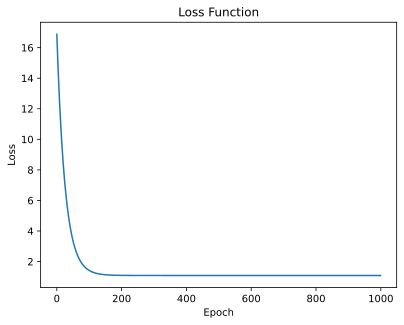

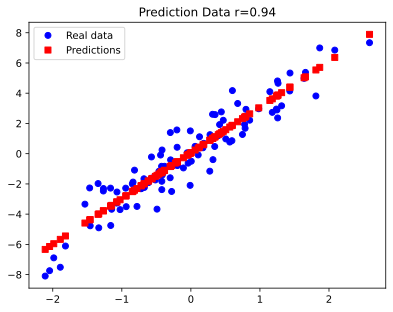

In [66]:
## Topic: Artificial Neural Network for Regression
# This is an improved version of the code without for loops

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate some random data
x = torch.randn(100, 1)
y = 3 * x + torch.randn(100, 1)

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        return self.linear(x)

# Training function with loss tracking
def train_model(model, criterion, optimizer, x, y, epochs=1000):
    loss_values = []
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        loss_values.append(loss.item())
    return model, loss_values

model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the model
model, loss_values = train_model(model, criterion, optimizer, x, y, epochs=1000)

# Plotting the loss function
plt.plot(loss_values)
plt.title('Loss Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Evaluating the model
model.eval()
predictions = model(x).detach()
r_value = torch.corrcoef(torch.cat((y, predictions), dim=1).T)[0, 1].item()

# Plotting the results
plt.plot(x.numpy(), y.numpy(), 'bo', label='Real data')
plt.plot(x.numpy(), predictions.numpy(), 'rs', label='Predictions')
plt.title(f'Prediction Data r={r_value:.2f}')
plt.legend()
plt.show()
